# Trotter 1 N scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares  
import time
from core_functions_Trotter import *

# First Order Analysis
Fit the scaling laws of the various dependences of the first order additive error and tight error bound to fit functions that depend on the parameters of the system.
## Additive Trotter Error
Use Theorem 1 under the following set of hypothesis: 
- $H = H^N = H_{XY}^N + H_{XZ}^N + H_{YZ}^N \equiv H_1 + H_2 + H_3$ 
- $\Gamma = 3$ (implied by the Hamiltonian decomposition)
- $S(t) = S_1(t) = \prod_{\gamma=1}^{\Gamma} e^{-it H_\gamma}$ $\implies$ $p=1$ order product formula. 
$\implies \left\|\mathcal{A}(t, N, \left\{g_{ij}\right\}_{i<j})\right\| = \mathcal{O}(\tilde{\alpha}_\text{comm}(N,\left\{g_{ij}\right\}_{i<j})t^2)$

Define $\mathcal{G} \coloneqq \left\{g_{ij}\right\}_{i<j}$.

Under these assumptions, $\tilde{\alpha}_\text{comm}(N,\left\{g_{ij}\right\}_{i<j})$ takes the following expression:
$$
\tilde{\alpha}_\text{comm} = 2(\|[H_1,H_2]\|+\|[H_1,H_3]\|+\|[H_2,H_3]\|)
$$
Work it out:
$$
\begin{split}
\tilde{\alpha}_\text{comm} &= 2(\|[H_1,H_2]\|+\|[H_1,H_3]\|+\|[H_2,H_3]\|) \\
&= \frac{1}{2}\left(\left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,X_pX_q + Z_qZ_q]\right\|
                   +\left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Y_qY_q,Y_pY_q + Z_qZ_q]\right\|
                   +\left\|\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}[X_pX_q + Z_qZ_q,Y_pY_q + Z_qZ_q]\right\|\right) \\
\end{split}
$$
For a dense gas of neutrinos forming a peaked beam:
$$
g_{ij} = \frac{\mu}{N}\left(1-\cos\theta_{ij}\right) = \frac{\mu}{N}\left(1-\cos\left(\arccos\left(\upsilon\right)\frac{|i-j|}{N-1}\right)\right) 
$$
Define $\Theta = \max_{i,j}\left(1-\cos\theta_{ij}\right)$. Note that $\Theta = \Theta(\upsilon)$, that is, depends only on the peakness of the beam, because $\max_{i,j}\left(1-\cos\theta_{ij}\right)$ is obtained for $|i-j| = N-1 \implies \Theta = 1-\upsilon$ which is independent of $N$.
Hence:
$$
\begin{split}
\tilde{\alpha}_\text{comm} 
&= 2(\|[H_1,H_2]\|+\|[H_1,H_3]\|+\|[H_2,H_3]\|) \\
&\leq \frac{1}{2}\left(\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}\|[X_pX_q + Y_qY_q,X_pX_q + Z_qZ_q]\|
                   +\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}\|[X_pX_q + Y_qY_q,Y_pY_q + Z_qZ_q]\|
                   +\sum_{p<q}^N\sum_{m<n}^Ng_{pq}g_{mn}\|[X_pX_q + Z_qZ_q,Y_pY_q + Z_qZ_q]\|\right) \\
&\leq \frac{\mu^2\Theta^2}{2N^2}\left(
     \sum_{p<q}^N\sum_{m<n}^N\|[X_pX_q + Y_qY_q,X_pX_q + Z_qZ_q]\|
    +\sum_{p<q}^N\sum_{m<n}^N\|[X_pX_q + Y_qY_q,Y_pY_q + Z_qZ_q]\|
    +\sum_{p<q}^N\sum_{m<n}^N\|[X_pX_q + Z_qZ_q,Y_pY_q + Z_qZ_q]\|
    \right) \\
& = \frac{\mu^2\Theta^2}{2N^2}[\text{function of }N] \\
\end{split}
$$
A counting argument implies that $[\text{function of }N]\sim N^3$.

## Fitting the first order additive Trotter error
We can also set up a slightly different approach: applying the triangular inequality once to the expression above one gets
$$
    a_1\leq\frac{1}{2}\left(
     \sum_{p<q}^{N_k}\sum_{m<n}^{N_k}\vert g_{pq}\vert\vert g_{mn}\vert\left\|[X_pX_q + Y_qY_q,X_mX_n + Z_mZ_n]\right\|
    +\sum_{p<q}^{N_k}\sum_{m<n}^{N_k}\vert g_{pq}\vert\vert g_{mn}\vert\left\|[X_pX_q + Y_qY_q,Y_mY_n + Z_mZ_n]\right\|
    +\sum_{p<q}^{N_k}\sum_{m<n}^{N_k}\vert g_{pq}\vert\vert g_{mn}\vert\left\|[X_pX_q + Z_qZ_q,Y_mY_n + Z_mZ_n]\right\|\right)
$$
The spectral norm of the generic commutator contribution is readily obtained as $\left\|[A_pA_q + B_qB_q,A_mA_n + C_mC_n]\right\| = \left\|\left[A_pA_q,C_mC_n\right] + \left[B_qB_q,A_mA_n\right] + \left[B_qB_q,C_mC_n\right]\right\|\leq 3$ because the spectral norm of any Pauli string is $1$; moreover, note that the three terms contribute equally. Hence, we define:
$$
a_1'(N_k,\mathcal{G}(N_k)) = \frac{9}{2}\sum_{p<q}^{N_k}\sum_{m<n}^{N_k}\Chi_{{\{p,q\}\cap\{m,n\}}=1}\vert g_{pq}\vert\vert g_{mn}\vert
$$
where the indicator function $\Chi_{{\{p,q\}\cap\{m,n\}}=1}$ ensures that only terms that share exactly one index for pairs $\{p,q\}$ and $\{m,n\}$. Temrs that share two indeces are null because they commute.

In [82]:
N_START = 3
N_END = 50
values_N = np.arange(N_START, N_END + 1)
mu = 1
# peakness_vls = np.round(np.arange(0.95, 0.99, 0.01), 2)
peakness_vls = np.array([0.99])

In [ ]:
# comm_terms = {}
# 
# for N in tqdm(values_N):
#     XY, XZ, YZ = gen_Heisenberg_terms(N)
# 
#     comm_terms[str(N)] = [
#         group_by_pauli_string(comm_lincombo(XY, XZ), N=N),
#         group_by_pauli_string(comm_lincombo(XY, YZ), N=N),
#         group_by_pauli_string(comm_lincombo(XZ, YZ), N=N),
#     ]

100%|██████████| 28/28 [02:35<00:00,  5.54s/it]


In [83]:
commutator_contributions_triang = {}

#comm_terms = {f"{n}": [globals()[f"terms_XY{n}XZ{n}"], globals()[f"terms_XY{n}YZ{n}"], globals()[f"terms_XZ{n}YZ{n}"]] for n in values_N }

for iN, N in enumerate(values_N):
    for ip, peak in enumerate(peakness_vls):
        print(N, peak)
        couplings, angles = fp_couplings(N, peak, mu)
        # commutator_contributions[f"{N},{peak}"] = eval_additive_error_term_T1(comm_terms[f"{N}"], couplings, N)
        commutator_contributions_triang[f"{N},{peak}"] = eval_additive_error_term_T1_triang(couplings, N)

3 0.99
4 0.99
5 0.99
6 0.99
7 0.99
8 0.99
9 0.99
10 0.99
11 0.99
12 0.99
13 0.99
14 0.99
15 0.99
16 0.99
17 0.99
18 0.99
19 0.99
20 0.99
21 0.99
22 0.99
23 0.99
24 0.99
25 0.99
26 0.99
27 0.99
28 0.99
29 0.99
30 0.99
31 0.99
32 0.99
33 0.99
34 0.99
35 0.99
36 0.99
37 0.99
38 0.99
39 0.99
40 0.99
41 0.99
42 0.99
43 0.99
44 0.99
45 0.99
46 0.99
47 0.99
48 0.99
49 0.99
50 0.99


### Fit $N$ of full additive (from (3.3.27))

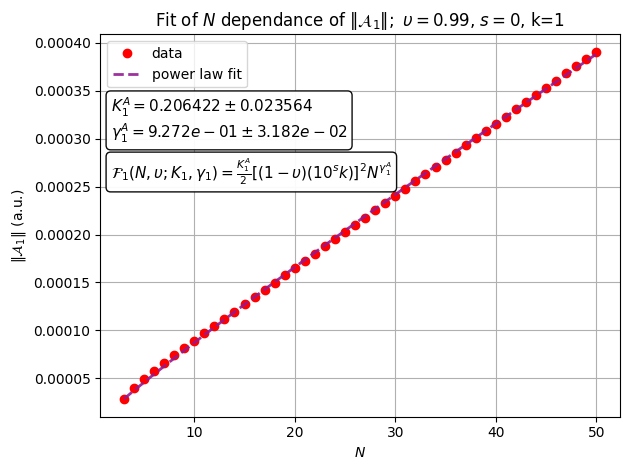

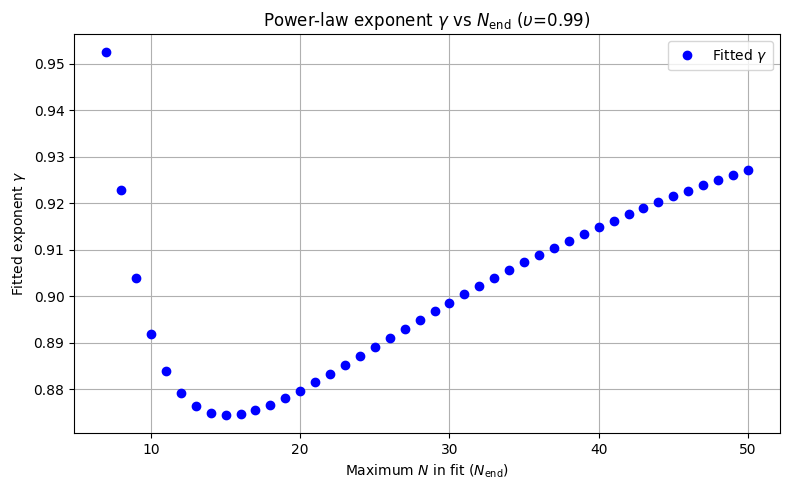

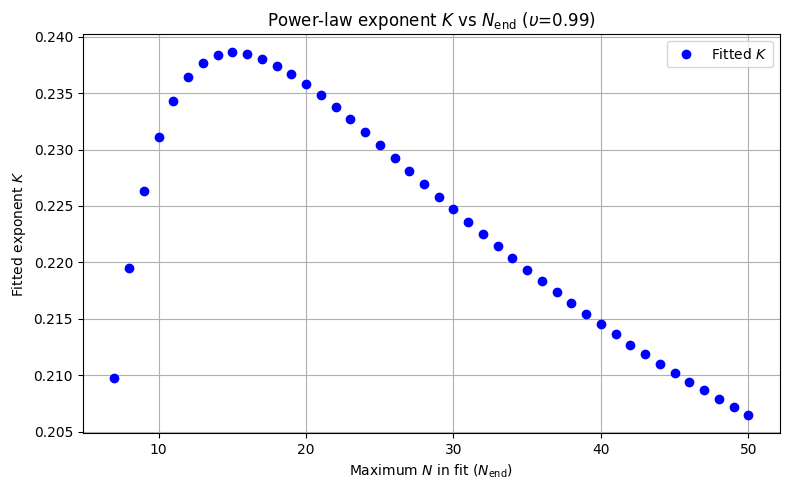

In [119]:
peak = 0.99
s = 0 # scale factor
k_step = 1 # can be just set to 1 (for now)
dt = 10**s * k_step

vals_triang = np.array([commutator_contributions_triang[f"{N},{peak}"]*(dt)**2 for N in values_N])
errors = (np.max(vals_triang) - np.min(vals_triang)) * 1e-1 / 2

idx = 0
values_N_masked = values_N[idx:]
vals_triang_masked = vals_triang[idx:]

def power_law_corrected(x, K, gamma):
    return ((1 - peak)**2 * (dt)**2) / 2 * K * x**gamma

m = Minuit(
    LeastSquares(values_N_masked, vals_triang_masked, errors, power_law_corrected),
    K=0.5, gamma=0.5
)
m.limits["K"] = (0, None)
m.migrad()
m.hesse()

x_fit = np.linspace(values_N.min(), values_N.max(), 300)
K, gamma = m.values["K"], m.values["gamma"]
err_K, err_gamma = m.errors["K"], m.errors["gamma"]
y_fit = power_law_corrected(x_fit, K, gamma)

fig, ax = plt.subplots()

ax.plot(values_N, vals_triang, "o", color="red", label="data")
ax.plot(x_fit[idx:], y_fit[idx:], "--", color="#921A92", linewidth=2, alpha=0.9, label="power law fit")

ax.text(
    0.02, 0.84,
    rf"$K_1^A = {K:.6f} \pm {err_K:.6f}$" "\n"
    rf"$\gamma_1^A = {gamma:.3e} \pm {err_gamma:.3e}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.text(
    0.02, 0.68,
    r"$\mathcal{F}_1(N, \upsilon; K_1, \gamma_1)=\frac{K_1^A}{2}\left[(1-\upsilon)(10^s k)\right]^2 N^{\gamma_1^A}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.set_xlabel(r"$N$")
ax.set_ylabel(r"$\|\mathcal{A}_1\|$ (a.u.)")
ax.set_title(r"Fit of $N$ dependance of $\|\mathcal{A}_1\|;$ $\upsilon=$"+f"{peak}, "+"$s=$"+f"{s}, "+"k="f"{k_step}")
ax.legend()
ax.grid()
fig.tight_layout()

fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_vs_N_T1.pdf")
plt.show()

# ----------------------------------------------------------------------------------------------------------------------------------------------------

gamma_vals = []
K_vals = []

MIN_POINTS = 5

for final_N in range(N_START + MIN_POINTS - 1, N_END + 1):
    valsN_power_fit = np.arange(N_START, final_N + 1)
    vals_triang_power_fit = np.array([commutator_contributions_triang[f"{N},{peak}"]*(dt**2) for N in valsN_power_fit])
    errors = (np.max(vals_triang_power_fit) - np.min(vals_triang_power_fit)) * 1e-1 / 2

    def power_law_corrected(x, K, gamma):
        return ((1 - peak)**2 * (dt)**2) / 2 * K * x**gamma

    m = Minuit(
        LeastSquares(valsN_power_fit, vals_triang_power_fit, errors, power_law_corrected),
        K=1, gamma=1
    )
    m.limits["K"] = (0, None)
    m.limits["gamma"] = (0, None)
    m.migrad()
    m.hesse()

    gamma_vals.append([m.values["gamma"], m.errors["gamma"]])
    K_vals.append([m.values["K"], m.errors["K"]])

gamma_vals = np.array(gamma_vals)
c_vals = np.array(K_vals)
N_ends = np.arange(N_START + MIN_POINTS - 1, N_END + 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_ends, gamma_vals[:, 0], "o", color="blue", label=r"Fitted $\gamma$")
ax.set_xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
ax.set_ylabel(r"Fitted exponent $\gamma$")
ax.set_title(r"Power-law exponent $\gamma$ vs $N_\text{end}$ ($\upsilon$=" + f"{peak})")
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_gamma_vs_Nend_T1.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_ends, c_vals[:, 0], "o", color="blue", label=r"Fitted $K$")
ax.set_xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
ax.set_ylabel(r"Fitted exponent $K$")
ax.set_title(r"Power-law exponent $K$ vs $N_\text{end}$ ($\upsilon$=" + f"{peak})")
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_K_vs_Nend_T1.pdf")
plt.show()

### Fit of $t$ dependance of additive Trotter

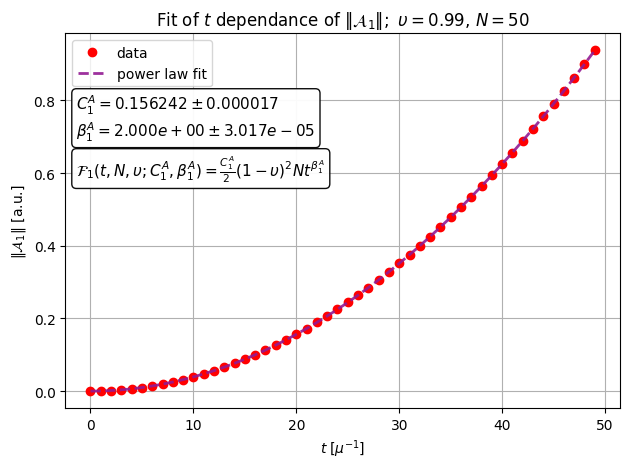

In [120]:
peak = 0.99
N = 50
dt_list = np.arange(0,50)

vals_additive = np.array([commutator_contributions_triang[f"{N},{peak}"]*(dt**2) for dt in dt_list])
errors = (np.max(vals_triang) - np.min(vals_triang)) * 1e-1 / 2

idx = 0
values_dt_masked = dt_list[idx:]
vals_triang_masked = vals_triang[idx:]

def model_t_fit(x, C, beta):
    return ((1 - peak)**2 * N) / 2 * C * x**beta

m = Minuit(
    LeastSquares(values_dt_masked, vals_additive, errors, model_t_fit),
    C=0.5, beta=0.5
)
m.limits["C"] = (0, None)
m.migrad()
m.hesse()

x_fit = np.linspace(dt_list.min(), dt_list.max(), 300)
C, beta = m.values["C"], m.values["beta"]
err_C, err_beta = m.errors["C"], m.errors["beta"]
y_fit = model_t_fit(x_fit, C, beta)

fig, ax = plt.subplots()

ax.plot(dt_list, vals_additive, "o", color="red", label="data")
ax.plot(x_fit[idx:], y_fit[idx:], "--", color="#921A92", linewidth=2, alpha=0.9, label="power law fit")

ax.text(
    0.02, 0.84,
    rf"$C_1^A = {C:.6f} \pm {err_C:.6f}$" "\n"
    rf"$\beta_1^A = {beta:.3e} \pm {err_beta:.3e}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.text(
    0.02, 0.68,
    r"$\mathcal{F}_1(t, N, \upsilon; C_1^A, \beta_1^A)=\frac{C_1^A}{2}(1-\upsilon)^2 N t^{\beta_1^A}$",
    transform=ax.transAxes,
    fontsize=11,
    va="top",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.95),
)

ax.set_xlabel(r"$t\;[\mu^{-1}]$")
ax.set_ylabel(r"$\|\mathcal{A}_1\|$ [a.u.]")
ax.set_title(r"Fit of $t$ dependance of $\|\mathcal{A}_1\|;$ $\upsilon=$"+f"{peak}, "+"$N=$"+f"{N}")
ax.legend()
ax.grid()
fig.tight_layout()

fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\additive_vs_t_T1.pdf")
plt.show()

### Power law fit
Fit the data points to a power law fit funtion
$$
\mathcal{F}(N; C, \gamma) = C\cdot N^\gamma
$$
We perform several fits of data sets
$$
\mathcal{D}_N = \left\{(N_k, a_1'(N_k, \mathcal{G}(N_k))),\, k=3,\dots,N\right\}
$$
(which is fixed by fixing $N$) to the power law fit function, keeping track of the value of the fitted $\gamma$ parameter.

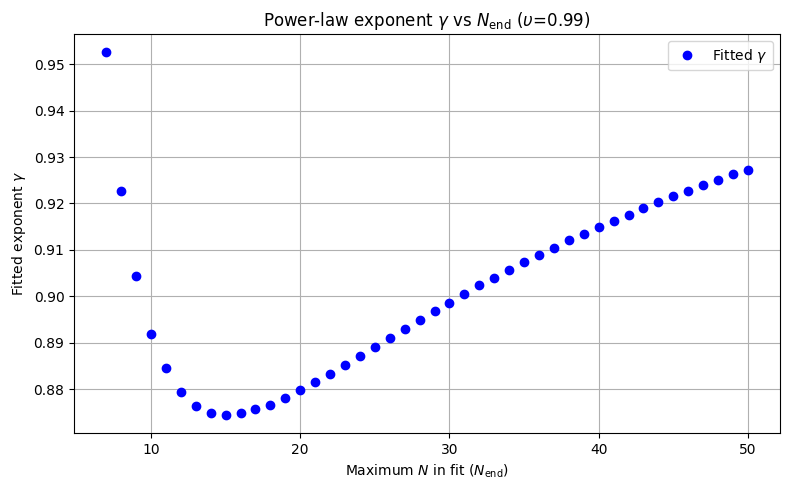

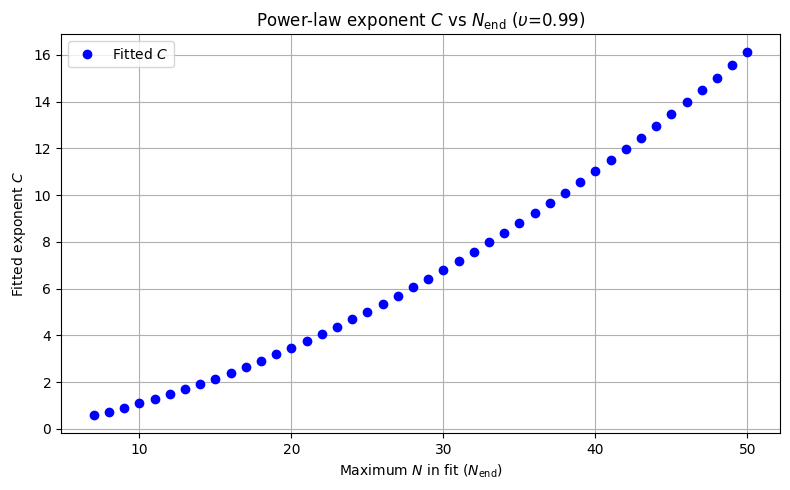

In [ ]:
def power_law(x, C, gamma):
    return C * x**gamma

peak = 0.99
gamma_vals = []
c_vals = []

MIN_POINTS = 5

for final_N in range(N_START + MIN_POINTS - 1, N_END + 1):
    valsN_power_fit = np.arange(N_START, final_N + 1)
    vals_triang_power_fit = np.array([commutator_contributions_triang[f"{N},{peak}"] for N in valsN_power_fit])
    errors = (np.max(vals_triang_power_fit) - np.min(vals_triang_power_fit)) * 1e-1 / 2

    def power_law_corrected(x, C, gamma):
        return (9 * (1 - peak)**2 / 2 / (valsN_power_fit.mean())**2) * C * x**gamma

    m = Minuit(
        LeastSquares(valsN_power_fit, vals_triang_power_fit, errors, power_law_corrected),
        C=1, gamma=1
    )
    m.limits["C"] = (0, None)
    m.limits["gamma"] = (0, None)
    m.migrad()
    m.hesse()

    gamma_vals.append([m.values["gamma"], m.errors["gamma"]])
    c_vals.append([m.values["C"], m.errors["C"]])

gamma_vals = np.array(gamma_vals)
c_vals = np.array(c_vals)
N_ends = np.arange(N_START + MIN_POINTS - 1, N_END + 1)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_ends, gamma_vals[:, 0], "o", color="blue", label=r"Fitted $\gamma$")
ax.set_xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
ax.set_ylabel(r"Fitted exponent $\gamma$")
ax.set_title(r"Power-law exponent $\gamma$ vs $N_\text{end}$ ($\upsilon$=" + f"{peak})")
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\gamma_vs_Nend.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(N_ends, c_vals[:, 0], "o", color="blue", label=r"Fitted $C$")
ax.set_xlabel(r"Maximum $N$ in fit ($N_\text{end}$)")
ax.set_ylabel(r"Fitted exponent $C$")
ax.set_title(r"Power-law exponent $C$ vs $N_\text{end}$ ($\upsilon$=" + f"{peak})")
ax.grid(True)
ax.legend()
fig.tight_layout()
fig.savefig(r"C:\Users\edori\Desktop\Nexus\Università\Current\MasterThesis\Images\imgs_additive\C_vs_Nend.pdf")
plt.show()

### Analysis of $g_{ij}$

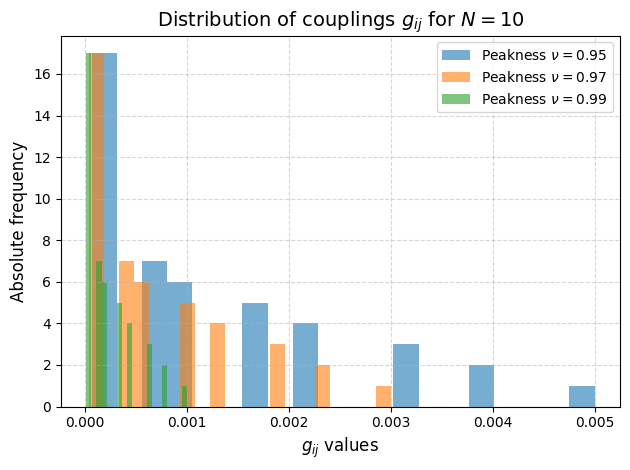

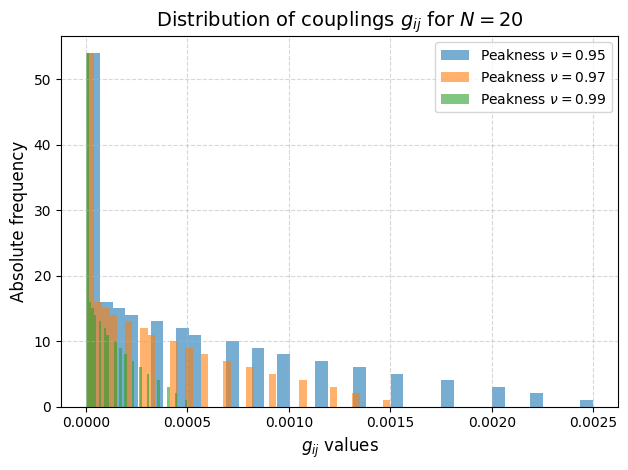

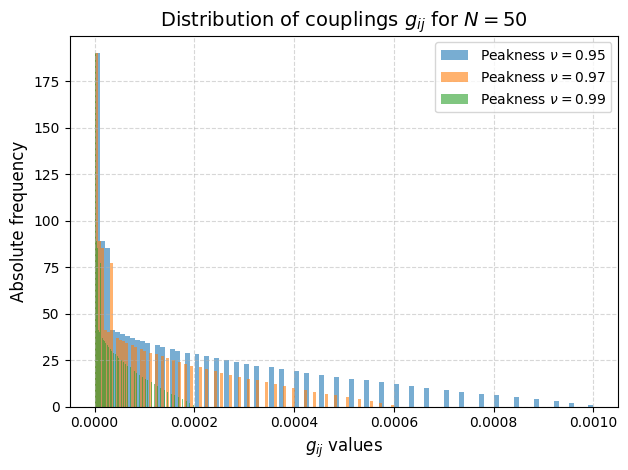

In [6]:
N_values = [10, 20, 50]
peakness_values = [0.95, 0.97, 0.99]
mu = 1.0

for N in N_values:
    plt.figure()
    for peak in peakness_values:
        couplings, _ = fp_couplings(N, peak, mu)
        g_values = list(couplings.values())
        plt.hist(g_values, bins=max(10, N*2), alpha=0.6, label=f'Peakness $\\nu={peak}$')

    plt.title(f'Distribution of couplings $g_{{ij}}$ for $N={N}$', fontsize=14)
    plt.xlabel(r'$g_{ij}$ values', fontsize=12)
    plt.ylabel('Absolute frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

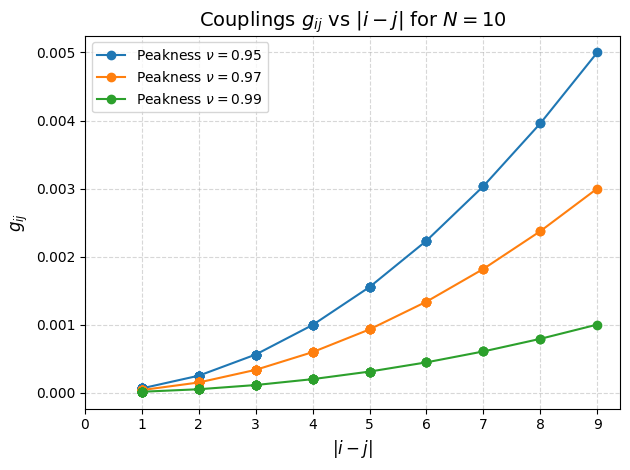

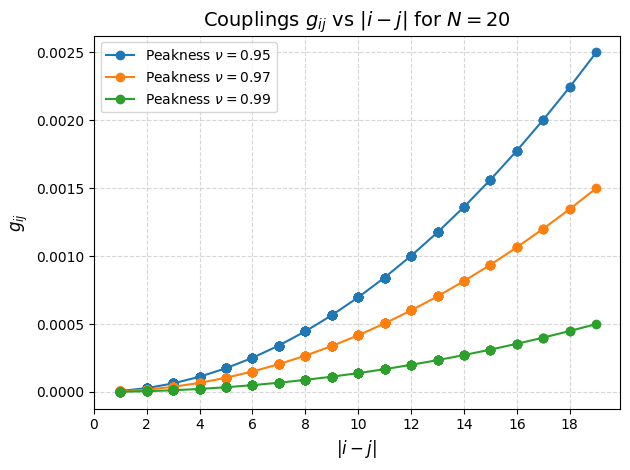

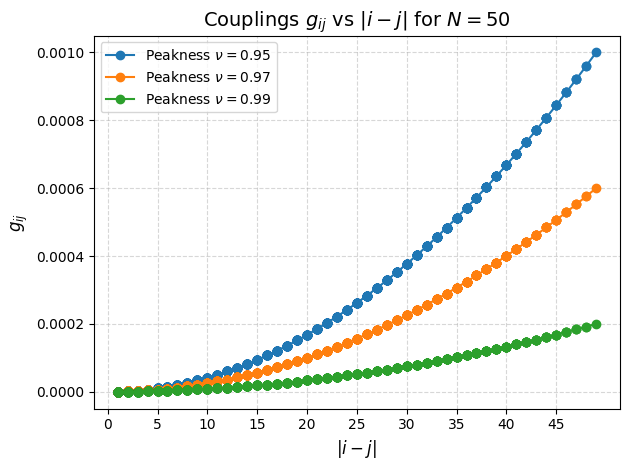

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N_values = [10, 20, 50]
peakness_values = [0.95, 0.97, 0.99]
mu = 1.0

for N in N_values:
    plt.figure()
    for peak in peakness_values:
        couplings, _ = fp_couplings(N, peak, mu)
        # Extract |i-j| and g_ij values
        ij_diff = []
        g_values = []
        for key, g in couplings.items():
            i, j = map(int, key[1:].split('_'))
            ij_diff.append(abs(i-j))
            g_values.append(g)
        # Sort by |i-j| for smooth lines
        ij_diff, g_values = zip(*sorted(zip(ij_diff, g_values)))
        plt.plot(ij_diff, g_values, marker='o', linestyle='-', label=f'Peakness $\\nu={peak}$')

    plt.title(f'Couplings $g_{{ij}}$ vs $|i-j|$ for $N={N}$', fontsize=14)
    plt.xlabel(r'$|i-j|$', fontsize=12)
    plt.ylabel(r'$g_{ij}$', fontsize=12)
    plt.xticks(range(0, N, max(1, N//10)))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()
